<a href="https://colab.research.google.com/github/srilaadebnath/SNUFilmFest/blob/main/SNUFilmFest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Data Collection for ML mini project (Responses) - Form Responses 1.csv to Data Collection for ML mini project (Responses) - Form Responses 1.csv
Cleaned column names: ['timestamp', 'age', "height\nrange_should_be_between_120_cm_-_220_cm\nnote(provide_the_height_in_integer_for_eg-124cm_,\n___________don't_provide_like_120.64)", 'weight\nrange_should_be_between_30_-_150_kg', 'cuisine_top1', 'cuisine_top2', 'cuisine_top3', 'spice_tolerance', 'dietary_preference', 'eating_out_per_week', 'food_budget_per_meal_note:_provide_integer_value_for_eg_like-199', 'sweet_tooth_level_(1_is_low_and_5_is_high)', 'tea_vs_coffee', 'movie_genre_top1', 'movie_genre_top2', 'movie_genre_top3', 'series_genre_top1', 'series_genre_top2', 'series_genre_top3', 'content_lang_top1', 'content_lang_top2', 'content_lang_top3', 'ott_top1', 'ott_top2', 'ott_top3', 'binge_frequency_per_week', 'screen_time_movies/series_in_hours_per_week__\n(provide_value_between_0-40)', 'gaming_days_per_week', 'gaming_hours_per_wee

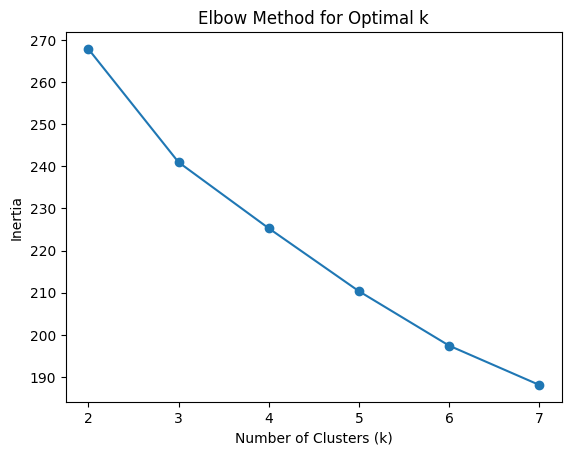

Silhouette Score: 0.171
Davies-Bouldin Index: 2.098


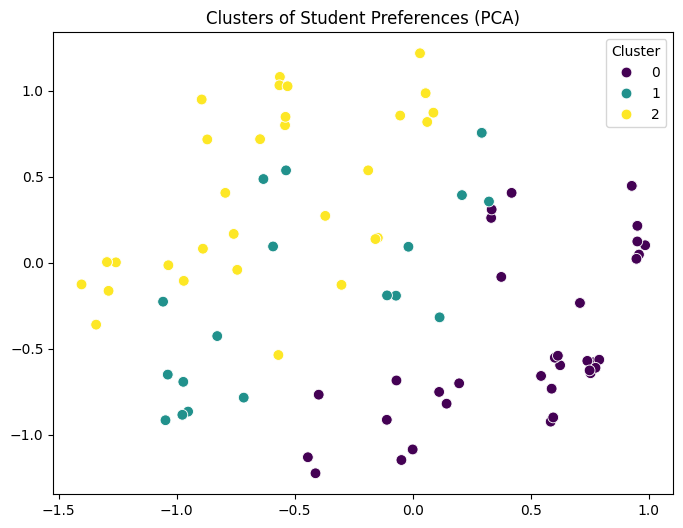

/tmp/ipython-input-622638848.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette="viridis")


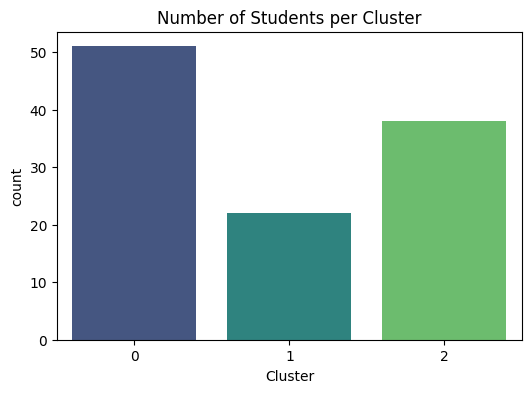


Cluster 0 Insights:
  Most common movie_genre_top1: Action
  Most common series_genre_top1: Crime
  Most common ott_top1: Netflix
  Most common content_lang_top1: English

Cluster 1 Insights:
  Most common movie_genre_top1: Thriller
  Most common series_genre_top1: Crime
  Most common ott_top1: Netflix
  Most common content_lang_top1: Bengali

Cluster 2 Insights:
  Most common movie_genre_top1: Action
  Most common series_genre_top1: Crime
  Most common ott_top1: Netflix
  Most common content_lang_top1: Hindi


In [1]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
filename = list(uploaded.keys())[0]

if filename.endswith('.xlsx'):
    df = pd.read_excel(filename)
else:
    df = pd.read_csv(filename)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Cleaned column names:", df.columns.tolist())

categorical_cols = [
    'movie_genre_top1','series_genre_top1',
    'ott_top1','content_lang_top1'
]

categorical_cols = [col for col in categorical_cols if col in df.columns]
df_selected = df[categorical_cols].fillna("Unknown")
print("Using columns:", categorical_cols)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df_selected)
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

inertia = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(encoded_df)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(encoded_df)

silhouette = silhouette_score(encoded_df, df['Cluster'])
db_index = davies_bouldin_score(encoded_df, df['Cluster'])
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(encoded_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="viridis", s=60)
plt.title("Clusters of Student Preferences (PCA)")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df['Cluster'], palette="viridis")
plt.title("Number of Students per Cluster")
plt.show()

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster']==cluster]
    print(f"\nCluster {cluster} Insights:")
    for col in categorical_cols:
        top_choice = cluster_data[col].mode()[0]
        print(f"  Most common {col}: {top_choice}")
